<a href="https://colab.research.google.com/github/mdshah29/DataScience/blob/main/PredictAttrition_JobAThon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Approach

1. Loaded Data in Pandas
2. Done EDA Analysis
  - Found Promotion detail for Employee
  - Set Target Attrition Variable from LastWorkingDay
  - Found Number of Days stayed with company - as a Difference in Days 
#  Found Age, Promotion, ratings are highly impacted on Attrition rates 
  - Dropped other columns and fit with RandomForest Model 
 
```



In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')

Libraries Import Succesfull


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Train Data
train_df=pd.read_csv('/content/drive/MyDrive/Job_Attrition_JobAThon/train_data_Attrition.csv',header=0) 
train_df.head()


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
# Test Data
test_df=pd.read_csv('/content/drive/MyDrive/Job_Attrition_JobAThon/test_data_Attrition.csv',header=0) 
test_df.head()


,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [6]:
train_df.shape, test_df.shape

((19104, 13), (741, 1))

In [7]:
train_df.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [9]:
train_df.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

- Wherever we found Last Working-Date mentioned , treating them as a Attrition Yes - and replacing them as 1 ..
- While for NAN, NA, NULL replaceing them with Attrition 0 as they are not leaving the Organization.

In [10]:
train_df['target'] = train_df["LastWorkingDate"].fillna(0)

In [11]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-11
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [12]:
#train_df['target'] = train_df["LastWorkingDate"].fillna(0)
train_df['target'] = train_df['target'].where(train_df['target'] == 0, 1)

In [23]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [17]:
#train_df_agg =  train_df.groupby('Emp_ID',as_index=False).agg({'target':'sum','Quarterly Rating':'mean','Promoted':'mean'})  {'EID':'count'}

In [19]:
#train_df_agg.head()

,Emp_ID,target
0,1,1
1,2,0
2,4,1
3,5,1
4,6,0


In [24]:
#train_df_agg.shape

In [25]:
train_df['promoted'] = np.where(train_df['Joining Designation'] < train_df['Designation'],1,0)

In [26]:
train_df['LastWorkingDate'] = pd.to_datetime(train_df['LastWorkingDate'])


In [27]:
train_df['Dateofjoining'] = pd.to_datetime(train_df['Dateofjoining'])


In [29]:
train_df['Difference'] = (train_df['LastWorkingDate'] - train_df['Dateofjoining']).dt.days
train_df['Difference'] = train_df["Difference"].fillna(0)

In [30]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,target,promoted,Difference
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0,0,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0,0,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,0,78.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0,0.0


,Emp_ID,target,Quarterly Rating,promoted
0,1,1,2.0,0.0
1,2,0,1.0,0.0
2,4,1,1.0,0.0
3,5,1,1.0,0.0
4,6,0,1.6,0.0


In [34]:
train_df = train_df.drop(['Dateofjoining','LastWorkingDate','MMM-YY'],axis=1)

In [35]:
train_df['target'] = train_df['target'].astype(int)
train_df['Difference'] = train_df['Difference'].astype(int)


In [36]:
train_df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,target,promoted,Difference
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0,0,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0,0,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1,0,78
3,2,31,Male,C7,Master,67016,2,2,0,1,0,0,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0,0,0


In [44]:
train_df_agg =  train_df.groupby('Emp_ID',as_index=False).agg({'Quarterly Rating':'mean','promoted':'mean','Age':'mean','target':'sum'})
train_df_agg.head()

,Emp_ID,Quarterly Rating,promoted,Age,target
0,1,2.0,0.0,28.0,1
1,2,1.0,0.0,31.0,0
2,4,1.0,0.0,43.0,1
3,5,1.0,0.0,29.0,1
4,6,1.6,0.0,31.0,0


In [45]:
train_df_agg['promoted'] = train_df_agg['promoted'].astype(int)
train_df_agg['Quarterly Rating'] = train_df_agg['Quarterly Rating'].astype(int)
train_df_agg['Age'] = train_df_agg['Age'].astype(int)

In [46]:
train_df_agg.head()

,Emp_ID,Quarterly Rating,promoted,Age,target
0,1,2,0,28,1
1,2,1,0,31,0
2,4,1,0,43,1
3,5,1,0,29,1
4,6,1,0,31,0


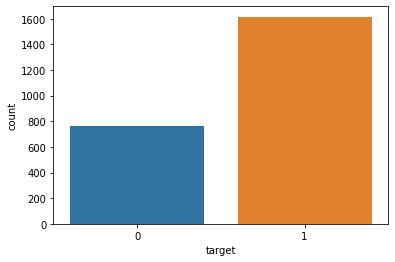

In [47]:
# Attrition Plot    # 0 - No , 1 - yes

sns.countplot(train_df_agg['target'])

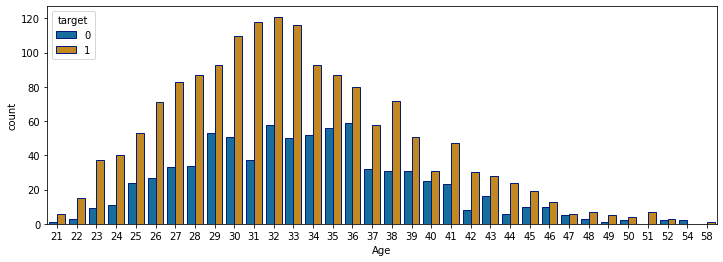

In [48]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='target', data = train_df_agg, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

# From Above chart can say that , maximum attrition is between 30 to 35 Age

In [52]:
#fig_dims = (12, 4)
#fig, ax = plt.subplots(figsize=fig_dims)

#sns.countplot(x='Gender', hue='target', data = train_df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

# From Above chart , can say Gender is not imposing Attrition decision 

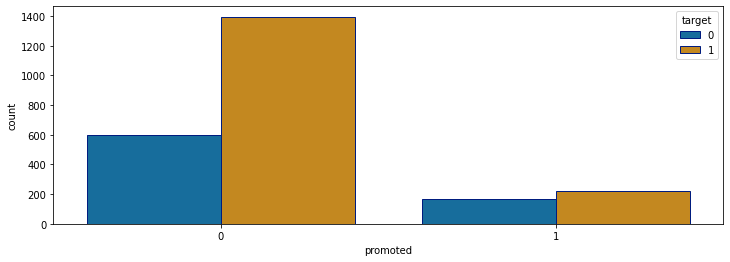

In [53]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='promoted', hue='target', data = train_df_agg, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

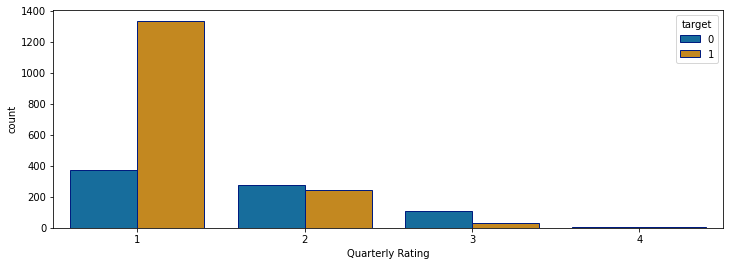

In [54]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Quarterly Rating', hue='target', data = train_df_agg, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [51]:
#fig_dims = (12, 4)
#fig, ax = plt.subplots(figsize=fig_dims)

#sns.countplot(x='Education_Level', hue='target', data = train_df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

# From Above all Graph we can comment that , Target "Attrition" is inversly propotional to the Promotion, and Rating, dependent on Age.

- its not dependent on Education , Gender etc ..


 - Droping extra columns and cleaning data ..

In [55]:
train_df_agg.head()

,Emp_ID,Quarterly Rating,promoted,Age,target
0,1,2,0,28,1
1,2,1,0,31,0
2,4,1,0,43,1
3,5,1,0,29,1
4,6,1,0,31,0


In [114]:
#df_for_modelling = train_df.drop(['City','Education_Level','Joining Designation','Designation','Total Business Value','Salary'],axis=1)

In [116]:
#df_for_modelling['Gender'] = df_for_modelling['Gender'].where(df_for_modelling['Gender'] == "MALE", 1)

In [56]:
#df_for_modelling.head()

In [57]:
train_df_agg.to_csv("/content/drive/MyDrive/Job_Attrition_JobAThon/model_solution.csv")

In [59]:
# Extracting target var in different df

from sklearn.model_selection import train_test_split
#Split your target and descriptive features
X = train_df_agg.drop(['target'],axis=1)
y = train_df_agg["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
X_test.head()
X_test.shape

(596, 4)

In [60]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [61]:
#Get the accuracy on the training data
forest.score(X, y)

0.9693406131877362

In [62]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[172   5]
 [ 10 409]]
Model Testing Accuracy = "0.9748322147651006!"



In [66]:
y_pred=forest.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       177
           1       0.99      0.98      0.98       419

    accuracy                           0.97       596
   macro avg       0.97      0.97      0.97       596
weighted avg       0.98      0.97      0.97       596

